## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [3]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [4]:
print(customer_set.columns, end="\n\n")
print(customer_set.shape, end="\n\n")
print(customer_set.dtypes)

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

(200, 5)

CustomerID        int64
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object


In [5]:
customer_set.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
customer_set.isna().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [7]:
customer_set = customer_set.drop({"CustomerID"}, axis=1)
customer_set

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

<Axes: xlabel='SpendingScore', ylabel='Count'>

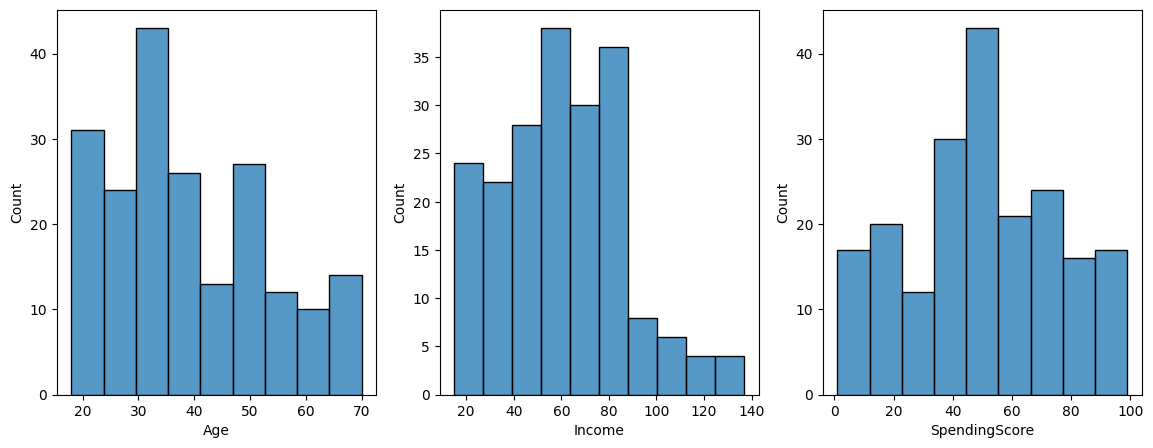

In [8]:
_, axis = plt.subplots(ncols=3, nrows=1, figsize=(14, 5))

sns.histplot(data=customer_set, x="Age", ax=axis[0])
sns.histplot(data=customer_set, x="Income", ax=axis[1])
sns.histplot(data=customer_set, x="SpendingScore", ax=axis[2])

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

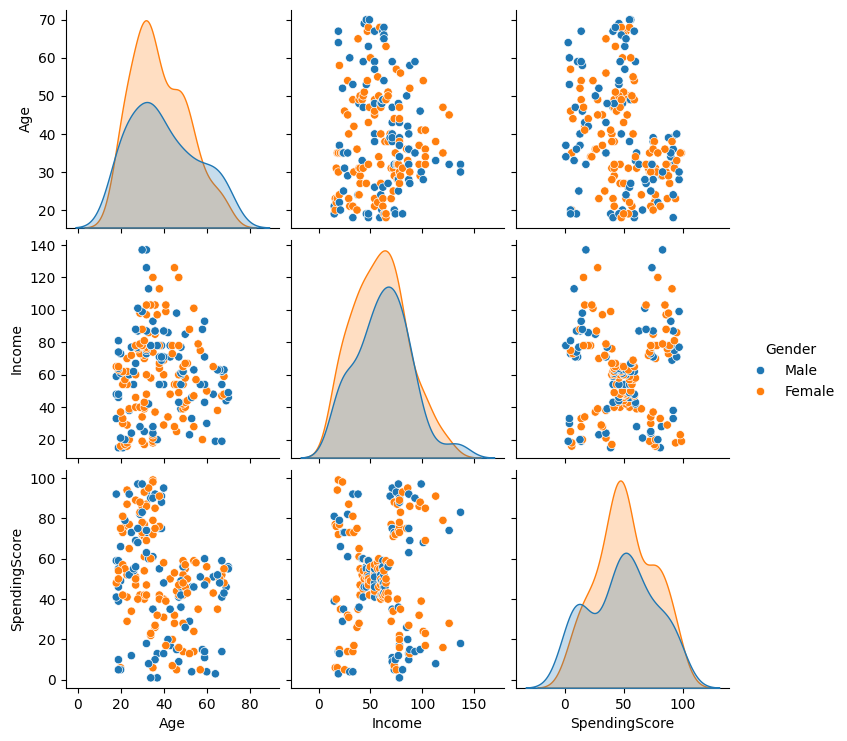

In [9]:
sns.pairplot(data=customer_set, hue="Gender", vars=["Age", "Income", "SpendingScore"])
plt.show()

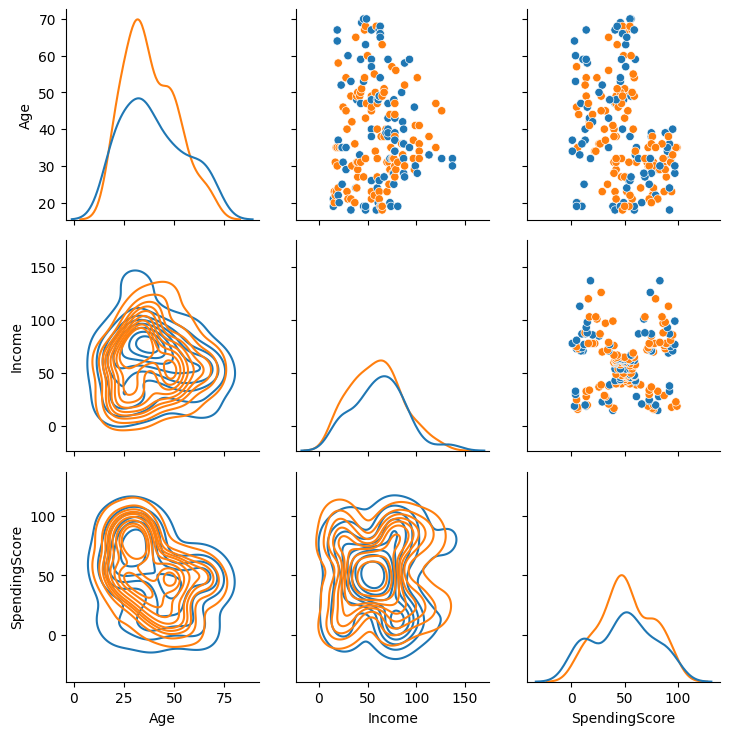

In [10]:
pairGrid = sns.PairGrid(data=customer_set, hue="Gender", vars=["Age", "Income", "SpendingScore"])
pairGrid.map_upper(sns.scatterplot)
pairGrid.map_diag(sns.kdeplot)
pairGrid.map_lower(sns.kdeplot, lw=1)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Ми завантажили датасет, вивели основну статистичну інформацію таку як: розмірність датасету, типи даних, які тут присутні. Нульові значення відстутні. Також побачили основну статистику по числовим змінним - квартилі, мінімальні та максимальні значення. Замінили **"Annual Income (k$)"** на **"Income"** та **"Spending Score (1-100)"** на **"SpendingScore"**, для зручності використання в подальшому.
2. Також видалили атрибут **CustomerID**, тому що він нам не потрібен для аналітики.
3. Ми побудували діаграми розподілу по таким змінним, як: **Age**, **Income** та **SpendingScore**. Графіки є приближені до нормального розподілу. Як бачимо, в середньому вік покупців є від 20 до 40 років. Із зарплатою від 50 до 80 тис долларів на рік. Та з показником витрат в 60-80 (%).
4. За подальшими графіками видно, що: дохід чоловіків менший, але одночасно і їх показник витрат теж зменшений, в порівнянні з жінками. Якщо дивитись на частину **Income** до **SpendingScore**, то вже видніється, що класів є десь приблизно 5. Але, якщо дивитись на **SpendingScore** та **Age**, то можемо побачити, що кластерів може бути і 3. При подальшому аналізі, ми визначимо вірну кількість.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Female: 56.00000000000001%
Male: 44.0%


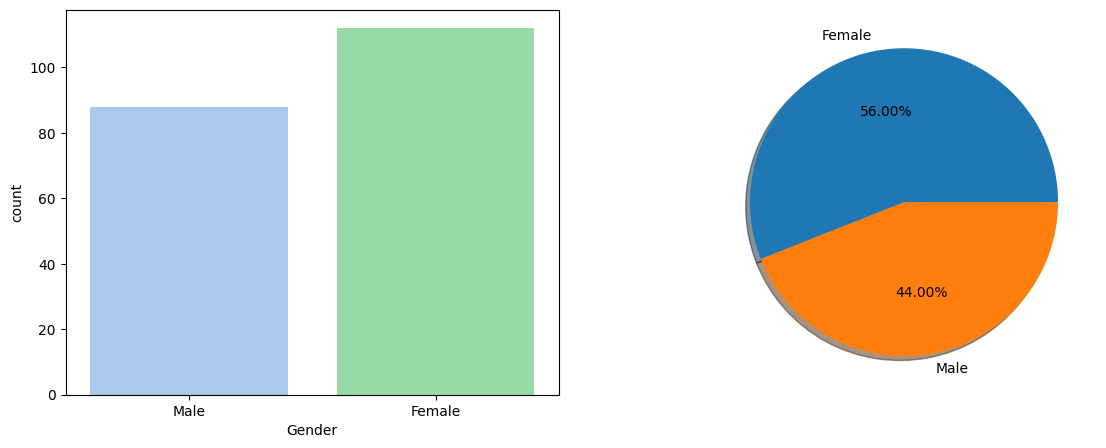

In [11]:
_, axes = plt.subplots(ncols=2, figsize=(14, 5))

print(f'Female: {(customer_set["Gender"].value_counts(normalize=True) * 100).iloc[0]}%')
print(f'Male: {(customer_set["Gender"].value_counts(normalize=True) * 100).iloc[1]}%')

sns.countplot(data=customer_set, x="Gender", palette='pastel6', ax=axes[0])
axes[1].pie(x=customer_set["Gender"].value_counts(), autopct='%0.2f%%', shadow=True, labels=["Female", "Male"])
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

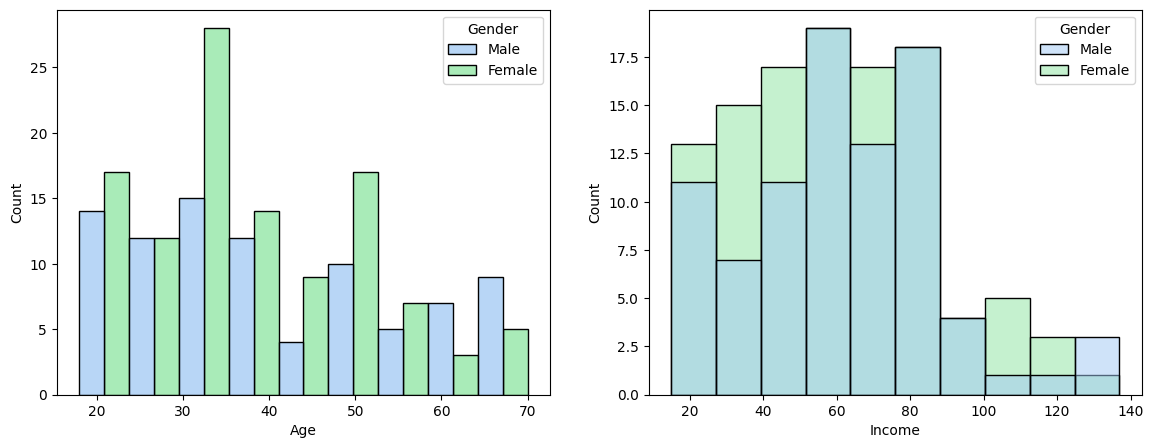

In [12]:
_, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.histplot(data=customer_set, x="Age", hue="Gender", palette='pastel6', ax=axes[0], multiple='dodge')
sns.histplot(data=customer_set, x="Income", hue="Gender", palette='pastel6', ax=axes[1], multiple='layer')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



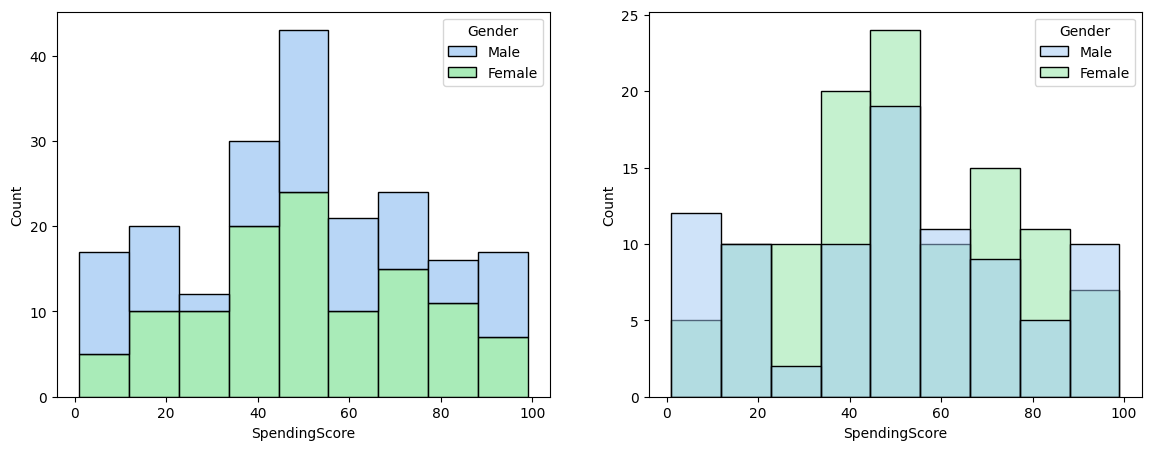

In [13]:
_, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", palette='pastel6', multiple='stack', ax=axes[0])
sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", palette='pastel6', multiple='layer', ax=axes[1])
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

<Axes: xlabel='SpendingScore'>

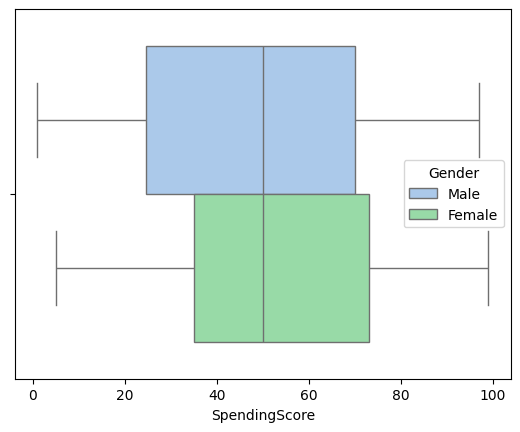

In [14]:
sns.boxplot(data=customer_set, x="SpendingScore", hue="Gender", palette='pastel6')

**Висновки з завдання 5 - 8(детальні)**

1. `Яке співвідношення груп чоловіків та жінок?` \
Жінок у цьому датасеті трішки більше чим чоловіків. Відношення виходить 56% на 44%. Заробітна плата жінок також, в середньому, трішки перевищує за чоловіків.
2. `Подивитись які можна виділити групи і як розподілені витрати відностно статі людини?` \
По графікам видно, що груп можна виділити 3. \
**1. Низькі витрати в діапазоні від 1 до 20** \
**2. Середні витрати в діапазоні від 21 до 80** \
**3. Високи витрати в діапазоні від 81 до 100** \
Витрати розподілені нормально.
3. `Чи є різниця між витратами у чоловіків та жінок?` \
Різниця присутня, у жінок показник витрати, є трішки вищим, чим у чоловіків. В середньому найменший показник витрат у чоловіків є приблизно 25, а у жінок 35. Максимальний в середньому є 70, а у жінок 75.

## K-means Method ##

**Завдання 9**

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну Gender, тому що **нам вона не буде потрібна для аналізу, щоб не розділять дані на гендери.** **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

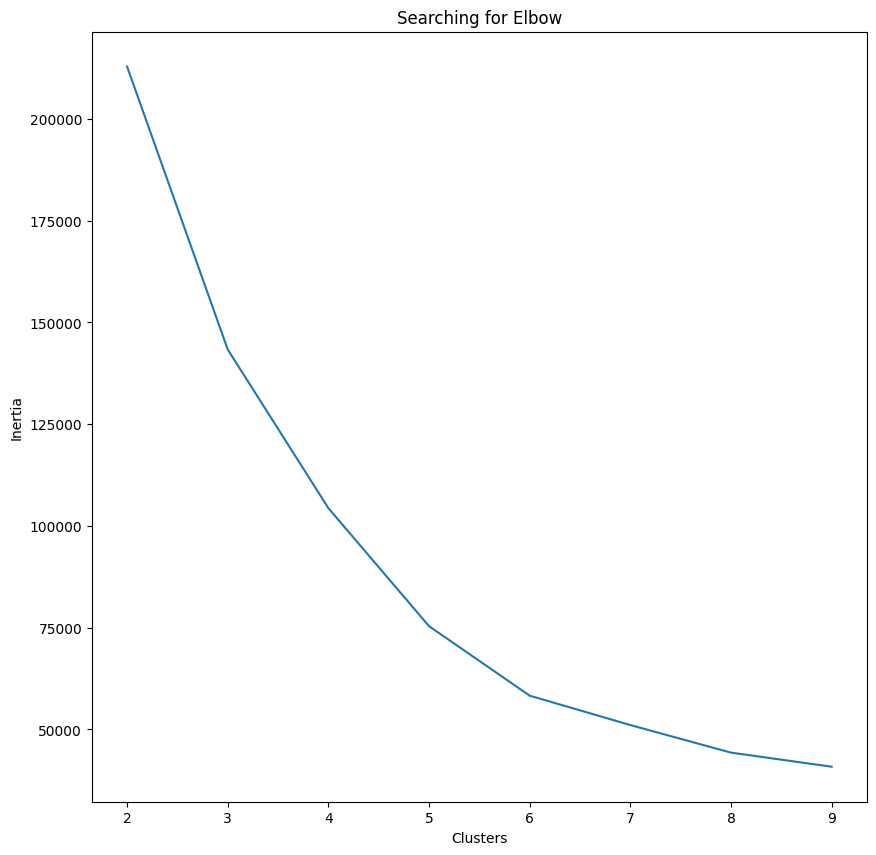

In [23]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=list(range(2, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

`Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)` \
В нашому аналізі раніше, ми побачили натяк на те, що кластерів буде 3 або 5. Але після нашого аналізу **k-means** і побудови графіку **Elbow**, тепер видно, що також має право бути гіпотеза про 6 кластерів. Якщо ще раз звертати увагу на графік **Elbow**, то видно, що найбільші кути заломлення є 5 та 6 кластерів. Далі я проведемо аналіз всіх 3 гіпотез, щоб визначити наймовірнішу кількість кластерів.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

<Axes: xlabel='Income', ylabel='SpendingScore'>

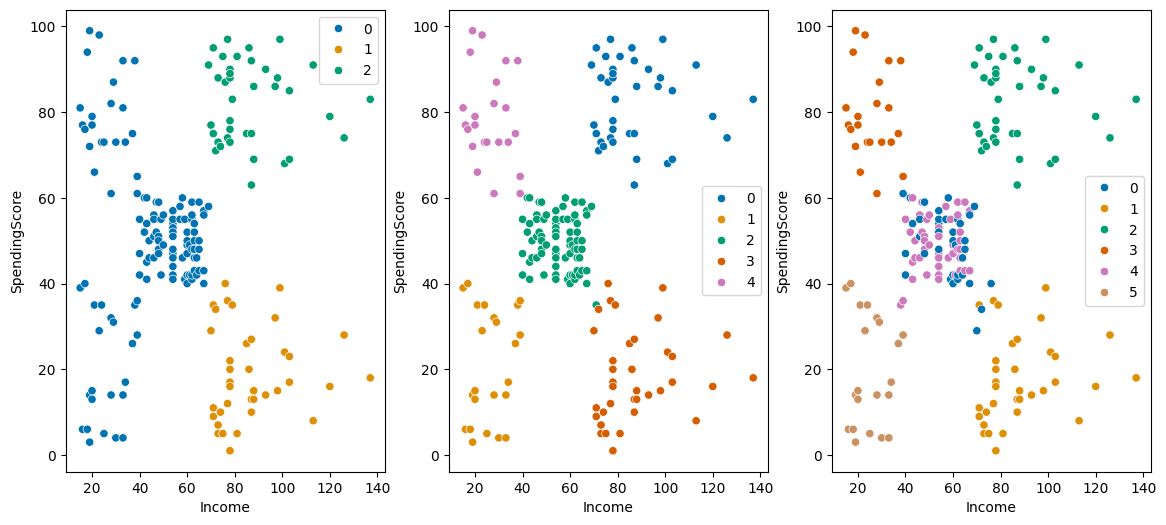

In [16]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=101)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=101)
kmeans_6 = KMeans(n_clusters=6, init='k-means++', random_state=101)

kmeans_3.fit(X)
kmeans_5.fit(X)
kmeans_6.fit(X)

_, axes = plt.subplots(ncols=3, figsize=(14, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_3.labels_, palette='colorblind', ax=axes[0])
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_5.labels_, palette='colorblind', ax=axes[1])
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_6.labels_, palette='colorblind', ax=axes[2])

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [17]:
fig_5_clusters = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color=kmeans_5.labels_,
                                symbol=kmeans_5.labels_, opacity=0.8)
fig_6_clusters = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color=kmeans_6.labels_,
                                symbol=kmeans_6.labels_, opacity=0.8)

fig_5_clusters.update_layout(width=800, height=600)
fig_6_clusters.update_layout(width=800, height=600)

fig_5_clusters.show()
fig_6_clusters.show()

**Висновки з завдання 10 - 11 (детальні)** 

(на 6 видно що воно лінійно роздільне)
Визначитась з отриманих візуалізацій, яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
1. На 2іх трьох графіках, які показуються 3, 5 та 6 кластерів. Видно, що це точно не 3 кластери. 5 кластерів виглядає найімовірніше, але в 6 кластерах, є така властивість, яка мене дуже зацікавила. Середній кластер поділений на 2, не лінійно роздільних кластери. Тому в подальшому аналізу, ми подивимось на 3Д візуалізацію 6 кластерів, щоб переглянути, як саме вони розташовані в 3-х вимірному просторі.
2. Тепер на 3Д візулацізаціях, ми бачимо, що гіпотеза з 6 кластерами, має право на життя. В 3-х вимірному просторі той самий середній кластер, є лінійно роздільним. Хоча, цього не скажеш по попердній 2Д візуалізації. На мою думку, 6 кластерів пасують сюди більше.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [18]:
numeric_data = customer_set.drop(['Gender'], axis=1)

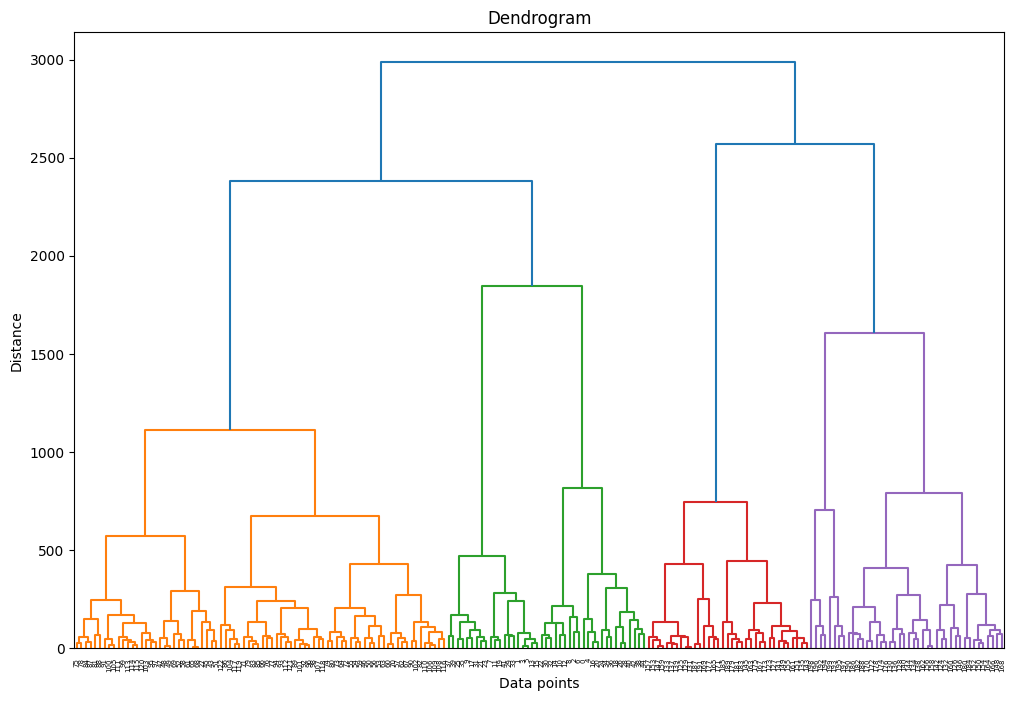

In [19]:
matrix = distance_matrix(numeric_data.values, numeric_data.values)

agglomerative_clustering = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
agglomerative_labels = agglomerative_clustering.fit_predict(numeric_data)

plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(matrix, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


**Висновки з завдання 12 (детальні)**

1. Після тренування нашої моделі методом Агломеративного кластерування, ми побудували дендрограму з 6 кластерами. На ній ми бачимо 5 кластерів, хоча я все одно притримуюсь думки, що вірне число це **6**. Далі порівняйому k-Means та Агломеративне кластерування для визначення фінального результату.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

Text(0.5, 1.0, 'Agglomerative clustering')

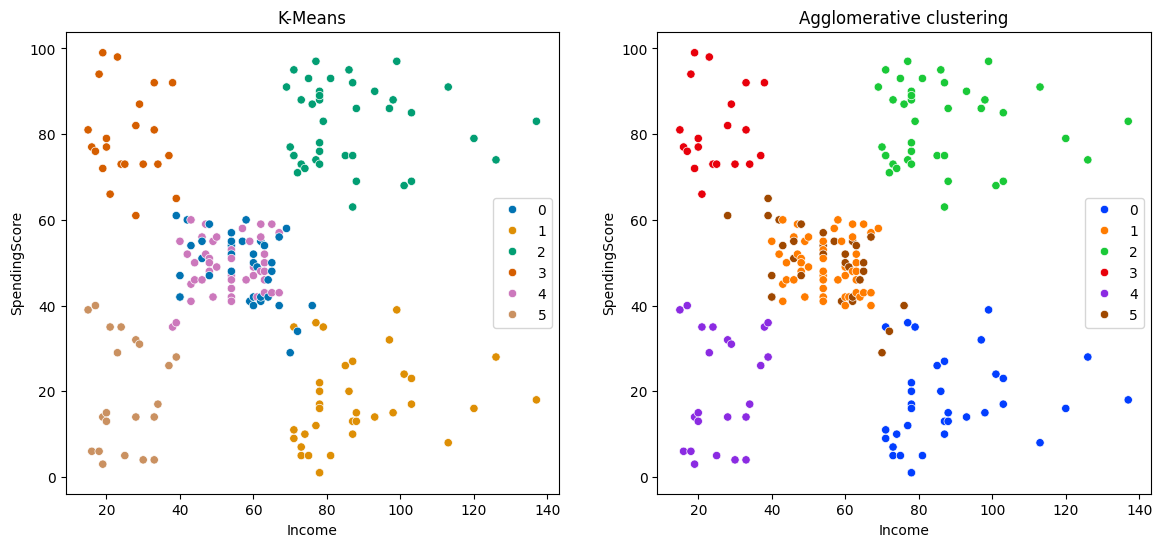

In [20]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_6.labels_, palette='colorblind', ax=axes[0])
axes[0].set_title("K-Means")

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=agglomerative_labels, palette='bright', ax=axes[1])
axes[1].set_title("Agglomerative clustering")


**Висновки з завдання 13 (детальні)**

На мою думку, **k-Means** справився трішки краще, чим **Agglomerative clustering**. 2 центральних кластери, в **Agglomerative clustering** забрали ще деякі точки інших сусідніх кластерів, хоча **k-Means** теж це зробив, але похибка там нижча. Тому, фінальним висновком буде, що найкраще справився метод **k-Means** з **6** кластерами.